1. csv 파일 읽어오기
2. info desc
3. datetime 필드 split 년,월,시간
4. casual, registered(사용자가 이미 등록되어 있는 대여 횟수)제거
5. x의 피처별 y값 막대그래프
6. 데이터 분리
7. 모델 설정:LinearRegression()
8. 훈련, predict
9. matric 보기(rmse,rmsle)
* 주요 infortance값 시각화(coef_)
-------------------------------
10. feature들 one-hot encoding
11. RandomForestRegressor, GradientBoostingRegressor, XGBRegressor,LGBMRegressor 알고리즘 적용

* date : hourly date + timestamp
* season : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
* holiday : 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌날
* workingday : 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일
* weather : 1=맑음, 약간 구름 낀 흐림, 2=안개, 안개 + 흐림, 3=가벼운 눈, 가벼운 비 + 천둥, 4=심한 눈/비, 천둥/번개
* temp:온도(섭씨)
* atemp:체감온도(섭씨)
* humidity:상대습도
* windspeed:풍속
* casual:사전에 등록되지 않는 사용자가 대여한 횟수
* registered:사전에 등록된 사용자가 대여한 횟수
* count:대여 횟수

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [59]:
df = pd.read_csv('./bike_train.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [60]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [60]:
# 연월일 split
df['연월일'] = df['datetime'].apply(lambda x: x.split(' ')[0])
df['year']= df['연월일'].apply(lambda x: x.split('-')[0])
df['month']= df['연월일'].apply(lambda x: x.split('-')[1])
df['day']= df['연월일'].apply(lambda x: x.split('-')[2])
df['time'] = df['datetime'].apply(lambda x: x.split(' ')[1])
df['time'] = df['time'].apply(lambda x : x.split(':')[0])
df.drop(['datetime','연월일'],axis=1,inplace=True)

In [61]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'time'],
      dtype='object')

In [62]:
# 데이터프레임 열 재정렬
df = df[['year', 'time', 'month', 'day','time', 'season',
        'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'
        ]]

In [63]:
# casual, registered 제거
df.drop(['casual','registered'],axis=1,inplace=True)

In [64]:
df

,year,time,month,day,time,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,00,01,01,00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011,01,01,01,01,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011,02,01,01,02,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011,03,01,01,03,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011,04,01,01,04,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,19,12,19,19,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012,20,12,19,20,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012,21,12,19,21,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012,22,12,19,22,4,0,1,1,13.94,17.425,61,6.0032,129


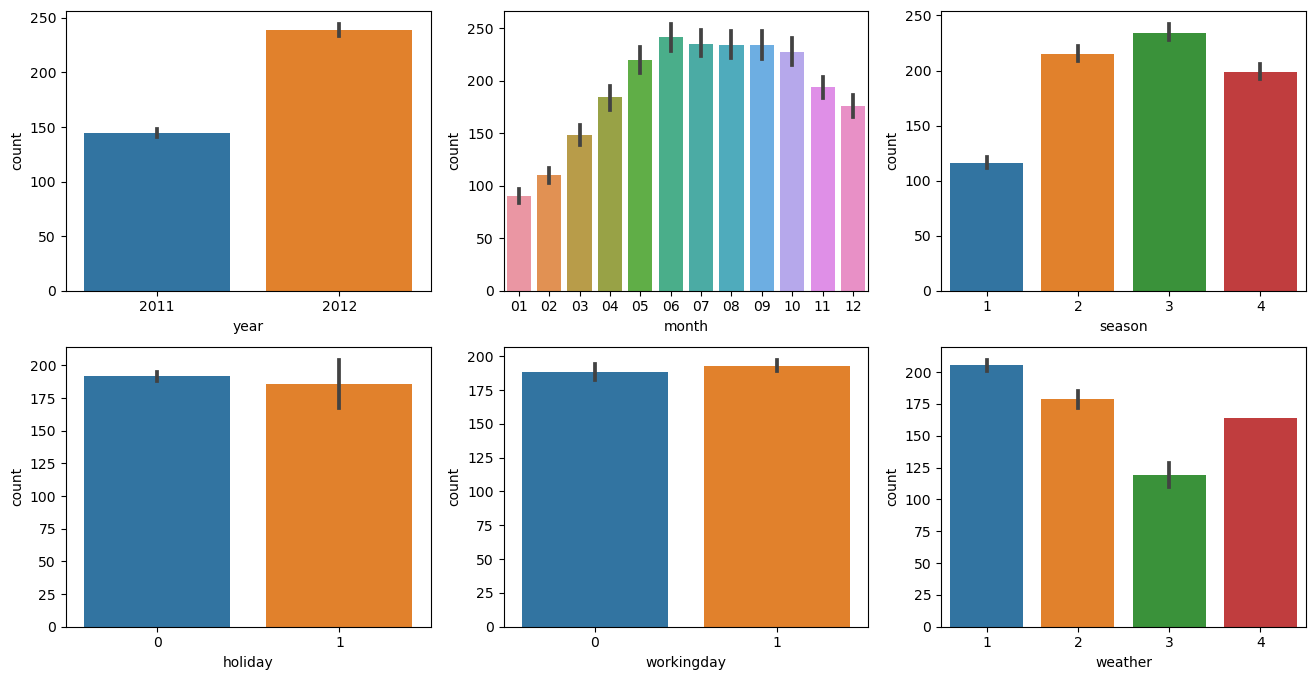

In [65]:
# x의 피처별 y값 막대그래프

fig, axs = plt.subplots(figsize=(16,8),ncols=3,nrows=2)
lm_features = ['year','month','season','holiday','workingday','weather']
for i,feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3
    sns.barplot(x=feature,y='count',data=df,ax=axs[row][col])

In [66]:
x_data = df.drop('count',axis=1,inplace=False)
y_target =df['count']

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=0)

lr=LinearRegression()
lr.fit(x_train,y_train)
y_preds=lr.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE :{0:.3f},RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_preds)))


MSE :19852.694,RMSE : 140.900
Variance score : 0.389


In [67]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: -164052.55926997698
회귀 계수값: [81.6  4.  10.2  0.5  4.  -8.  -5.9  3.1 -5.5  2.6  3.8 -2.1  0.3]


In [68]:
df.columns

Index(['year', 'time', 'month', 'day', 'time', 'season', 'holiday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count'],
      dtype='object')

In [69]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=df.drop('count',axis=1).columns)
coeff.sort_values(ascending=False)

year          81.6
month         10.2
time           4.0
time           4.0
atemp          3.8
workingday     3.1
temp           2.6
day            0.5
windspeed      0.3
humidity      -2.1
weather       -5.5
holiday       -5.9
season        -8.0
dtype: float64

In [70]:
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    neg_mse_scores = cross_val_score(ridge,x_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse= np.mean(rmse_scores)
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha,avg_rmse))

c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.21587e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=6.49576e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\seon\.conda\envs\myenv\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.99897e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


alpha 0일 때 5 folds의 평균 RMSE: 142.408
alpha 0.1일 때 5 folds의 평균 RMSE: 141.199
alpha 1일 때 5 folds의 평균 RMSE: 141.197
alpha 10일 때 5 folds의 평균 RMSE: 141.183
alpha 100일 때 5 folds의 평균 RMSE: 141.113


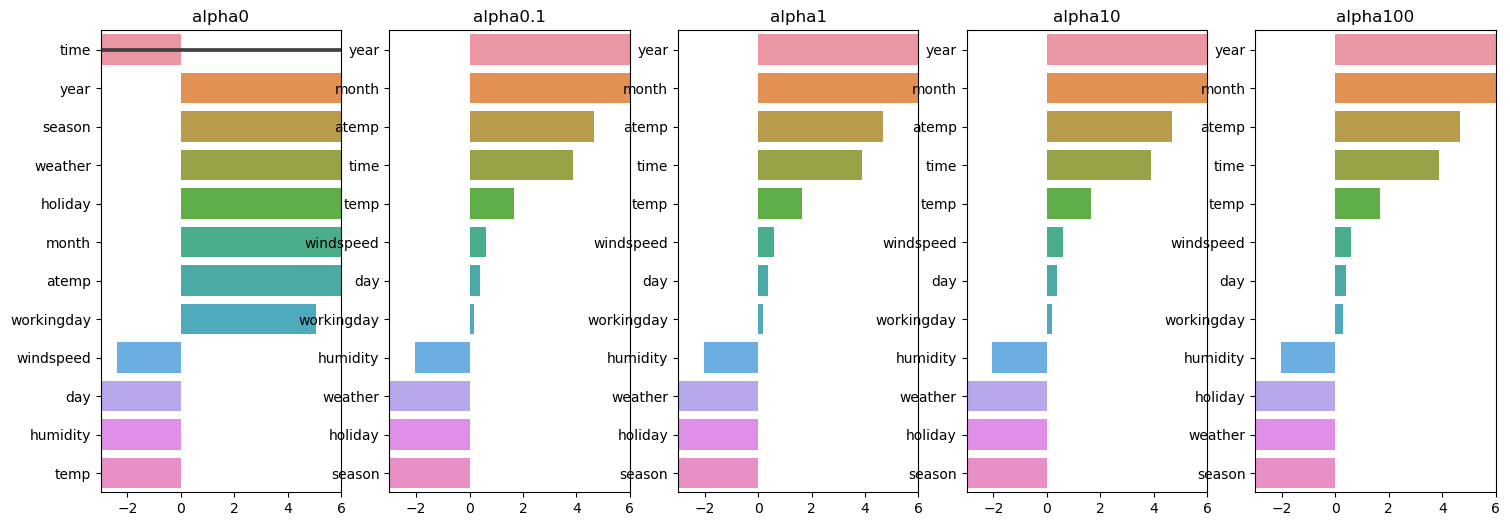

In [71]:
fig, axs =plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df =pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    coeff = pd.Series(data=ridge.coef_,index=x_data.columns)
    colname='alpha'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])

plt.show()

In [57]:
# one-hot-encoding year,season,weather


,season
0,1
1,1
2,1
3,1
4,1
...,...
10881,4
10882,4
10883,4
10884,4


In [58]:
pd.get_dummies(df2)

,season
0,1
1,1
2,1
3,1
4,1
...,...
10881,4
10882,4
10883,4
10884,4
